### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import os
os.chdir('..')
import sparklyRGT as rgt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


C:\Users\brett\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
%load_ext autoreload
%autoreload 2

***

# 1) Load data into Python



In [3]:
file_names = ['..\\data\\BH10_raw_rgt-baseline_S40-43.xlsx','..\\data\\BH10_raw_rgt_S44.xlsx'] 

df = rgt.load_data(file_names)

df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_A-cue,2022-02-28,16:05:50,1,0.0,1,0.0,NaN,40,1.0,...,0,0,5,0,0,0,0,0,0,0
1,rGT_A-cue,2022-02-28,16:05:50,1,0.0,1,0.0,NaN,40,2.0,...,0,0,0,0,0,0,0,0,0,0
2,rGT_A-cue,2022-02-28,16:05:50,1,0.0,1,0.0,NaN,40,3.1,...,0,0,0,1,5,0,0,0,0,0
3,rGT_A-cue,2022-02-28,16:05:50,1,0.0,1,0.0,NaN,40,3.1,...,0,0,0,1,5,0,0,0,0,0
4,rGT_A-cue,2022-02-28,16:05:50,1,0.0,1,0.0,NaN,40,3.1,...,0,0,0,1,5,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [12]:
classic_males = [41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56] 
classic_females = list(range(9,25))

cued_males = [33,34,35,36,37,38,39,40,57,58,59,60,61,62,63,64]
cued_females = [1,2,3,4,5,6,7,8,25,26,27,28,29,30,31,32]

group_names = {0: 'classic males',
              1: 'cued males',
              2: 'classic females',
              3: 'cued females'} 

group_list = [classic_males,cued_males,classic_females,cued_females]

title = 'rGT baseline' #for plotting

startsess = 40 #first session you would like to include in figures
endsess = 44 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [4]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2022-02-21  35          45.1
         2022-02-22  36          58.1
         2022-02-23  37          60.0
         2022-02-24  38          62.1
         2022-02-25  39          66.0
2        2022-02-21  35          77.1
         2022-02-22  36         108.0
         2022-02-23  37         131.0
         2022-02-24  38          89.0
         2022-02-25  39         126.0
3        2022-02-21  35          72.0
         2022-02-22  36          80.0
         2022-02-23  37          69.1
         2022-02-24  38          68.1
         2022-02-25  39          69.0
4        2022-02-21  35          73.0
         2022-02-22  36          97.0
         2022-02-23  37          95.0
         2022-02-24  38          95.0
         2022-02-25  39          78.0
5        2022-02-21  35          69.0
         2022-02-22  36          67.0
         2022-02-23  37          64.1
         2022-02-24  38          65.0
         2022-02-25  39          55.0
6        2022-02-21  

### Drop/edit session numbers

In [4]:
df2 = rgt.edit_sessions(df, orig_sess = [0], new_sess = [33], subs = [10,11,12])

### Check that you dropped/edited the desired session(s)

In [7]:
rgt.check_sessions(df2) 

Subject  StartDate   Session
1        2022-02-14  30          62.1
         2022-02-15  31          56.1
         2022-02-16  32          71.0
         2022-02-17  33          61.1
         2022-02-18  34          51.0
2        2022-02-14  30         125.0
         2022-02-15  31         128.0
         2022-02-16  32         117.0
         2022-02-17  33         139.0
         2022-02-18  34         124.0
3        2022-02-14  30          59.1
         2022-02-15  31          75.0
         2022-02-16  32          66.0
         2022-02-17  33          70.1
         2022-02-18  34          71.0
4        2022-02-14  30          67.0
         2022-02-15  31          65.0
         2022-02-16  32          63.0
         2022-02-17  33          70.0
         2022-02-18  34          82.0
5        2022-02-14  30          58.0
         2022-02-15  31          60.0
         2022-02-16  32          76.0
         2022-02-17  33          74.0
         2022-02-18  34          61.1
6        2022-02-14  

## Data processing

### Calculate variables for each rat


In [7]:
df_sum = rgt.get_summary_data(df) #change to df instead of df2 if you didn't do any session editing
df_sum 

,40P1,40P2,40P3,40P4,41P1,41P2,41P3,41P4,42P1,42P2,...,trial40,trial41,trial42,trial43,trial44,prem40,prem41,prem42,prem43,prem44
1,2.5641,5.12821,92.3077,0,0,4.16667,95.8333,0,0,0,...,39.0,49.0,45.1,43.0,70.0,47.297297,33.783784,32.307692,39.436620,15.662651
2,1.03093,92.7835,6.18557,0,0,97.0588,2.94118,0,0,97.4138,...,98.0,102.0,120.1,86.1,97.0,16.239316,23.880597,19.047619,20.370370,26.515152
3,4.16667,9.72222,84.7222,1.38889,1.49254,0,94.0299,4.47761,1.36986,6.84932,...,72.0,67.0,73.0,69.0,73.0,16.279070,22.093023,9.876543,12.658228,8.750000
4,2.66667,61.3333,0,36,2.29885,51.7241,1.14943,44.8276,2.5641,48.7179,...,75.0,87.0,79.1,86.0,81.0,38.016529,11.224490,14.130435,10.416667,18.181818
5,4.54545,6.06061,80.303,9.09091,1.69492,1.69492,93.2203,3.38983,0,3.27869,...,66.0,59.0,61.1,65.0,68.0,19.512195,33.707865,24.691358,28.571429,24.444444
6,5.55556,66.6667,11.1111,16.6667,0,75.2381,13.3333,11.4286,3.09278,70.1031,...,73.1,105.0,97.1,102.0,103.0,25.000000,16.666667,25.954198,19.047619,11.965812
7,4.44444,17.7778,48.8889,28.8889,8.06452,14.5161,62.9032,14.5161,9.375,28.125,...,51.0,64.0,65.0,70.0,62.0,13.559322,20.000000,17.721519,4.109589,8.823529
8,3.33333,45,0,51.6667,7.24638,56.5217,0,36.2319,1.63934,52.459,...,60.0,70.1,62.0,65.0,61.0,20.000000,26.595745,29.545455,10.958904,23.750000
9,28.0899,49.4382,13.4831,8.98876,28.8462,44.2308,10.5769,16.3462,35.2941,42.0168,...,90.0,104.0,119.0,98.0,118.0,14.285714,12.605042,9.848485,14.782609,10.606061
10,0,50.7937,6.34921,42.8571,0,53.7313,7.46269,38.806,0,56.4516,...,64.0,70.0,67.0,70.0,74.0,13.513514,14.634146,10.666667,1.408451,12.941176


In [ ]:
df_long = rgt.get_long_summary_data(df, df_sum)
df_long.head()

In [ ]:
df_long = rgt.get_risk_status_long(df_long)
df_long = rgt.get_group_long(df_long, group_list)

### Get the risk status of the rats


In [16]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

# print(df_sum[['mean_risk','risk_status']]) 
# print(risky, optimal) 

### Export your data to an Excel file 


In [19]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = 'group', 
                    new_file_name = 'BH10_rgt-baseline_S40-44.xlsx', asin = True)

## Run Anova on selected variables

In [ ]:
rgt.rm_anova(df_long)

In [ ]:
rgt.mixed_anova(df_long, "group")

## Calculate means and SEMs for your experimental groups



In [9]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,40P1,40P2,40P3,40P4,41P1,41P2,41P3,41P4,42P1,42P2,...,trial40,trial41,trial42,trial43,trial44,prem40,prem41,prem42,prem43,prem44
classic males,8.60103,50.5387,30.3005,10.5598,7.43795,49.5241,29.1581,13.8799,3.73271,50.5807,...,89.5062,84.65,91.15,95.9625,92.3187,15.4688,17.8345,15.3118,14.1074,14.0003
cued males,3.68936,45.3612,33.5661,17.3834,2.90543,46.2548,33.5932,17.2465,1.92597,46.1985,...,83.575,81.9437,89.575,89.0375,88.5125,16.4358,22.3357,15.1124,15.4618,14.4319
classic females,14.2371,53.8832,17.1386,14.7412,10.142,55.1369,17.7713,16.9497,13.6394,58.0057,...,82.5625,84.6312,87.45,82.6562,87.5125,12.368,17.0196,9.97084,12.6261,12.9597
cued females,4.05469,37.0843,32.9592,25.9018,4.00713,35.4273,35.6641,24.9014,3.2274,32.9714,...,69.7,73.2688,72.7937,76.5062,77.7,23.0959,25.6032,22.9159,19.1987,18.4349


### Calculate means and SEMS for task groups, split by risk status and/or sex

In [17]:
classic_male_risky = [subject for subject in classic_males if subject in risky]
classic_female_risky = [subject for subject in classic_females if subject in risky]

cued_male_risky = [subject for subject in cued_males if subject in risky]
cued_female_risky = [subject for subject in cued_females if subject in risky]

classic_male_optimal = [subject for subject in classic_males if subject in optimal]
classic_female_optimal = [subject for subject in classic_females if subject in optimal]

cued_male_optimal = [subject for subject in cued_males if subject in optimal]
cued_female_optimal = [subject for subject in cued_females if subject in optimal]

group_list_all = [classic_male_risky,classic_female_risky,cued_male_risky,cued_female_risky,
                  classic_male_optimal,classic_female_optimal,cued_male_optimal,cued_female_optimal]

#make sure the group names are in the same order as the group list!
group_names_all = {0:'risky classic males', 
                    1: 'risky classic females',
                    2: 'risky cued males',
                    3: 'risky cued females',
                    4: 'optimal classic males',
                    5: 'optimal classic females',
                    6: 'optimal cued males',
                    7: 'optimal cued females'}

mean_scores_all, SEM_all = rgt.get_means_sem(df_sum, group_list_all, group_names_all)


In [17]:
risky_females = np.concatenate((classic_female_risky,cued_female_risky))
optimal_females = np.concatenate((classic_female_optimal,cued_female_optimal))

risky_males = np.concatenate((classic_male_risky,cued_male_risky))
optimal_males = np.concatenate((classic_male_optimal,cued_male_optimal))

group_list_risk_sex = [risky_females,risky_males,optimal_females,optimal_males]

group_names_risk_sex = {0: 'risky females',
                       1: 'risky males',
                       2: 'optimal females',
                       3: 'optimal males'}

mean_scores_risk_sex, SEM_risk_sex = rgt.get_means_sem(df_sum, group_list_risk_sex, group_names_risk_sex)

In [18]:
classic = np.concatenate((classic_males,classic_females))
cued = np.concatenate((cued_males,cued_females))

group_list_task = [classic,cued]

group_names_task = {0: 'classic',
                   1: 'cued'}

mean_scores_task, SEM_task = rgt.get_means_sem(df_sum,group_list_task,group_names_task)

In [24]:
optimal_classic = np.concatenate((classic_male_optimal, classic_female_optimal))
risky_classic = np.concatenate((classic_male_risky, classic_female_risky))

optimal_cued = np.concatenate((cued_male_optimal,cued_female_optimal))
risky_cued = np.concatenate((cued_male_risky,cued_female_risky))

group_list_task_risk = [optimal_classic,risky_classic,optimal_cued,risky_cued]

group_names_task_risk = {0: 'optimal classic',
                       1: 'risky classic',
                        2: 'optimal cued',
                       3: 'risky cued'}

mean_scores_task_risk, SEM_task_risk = rgt.get_means_sem(df_sum,group_list_task_risk,group_names_task_risk)

# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


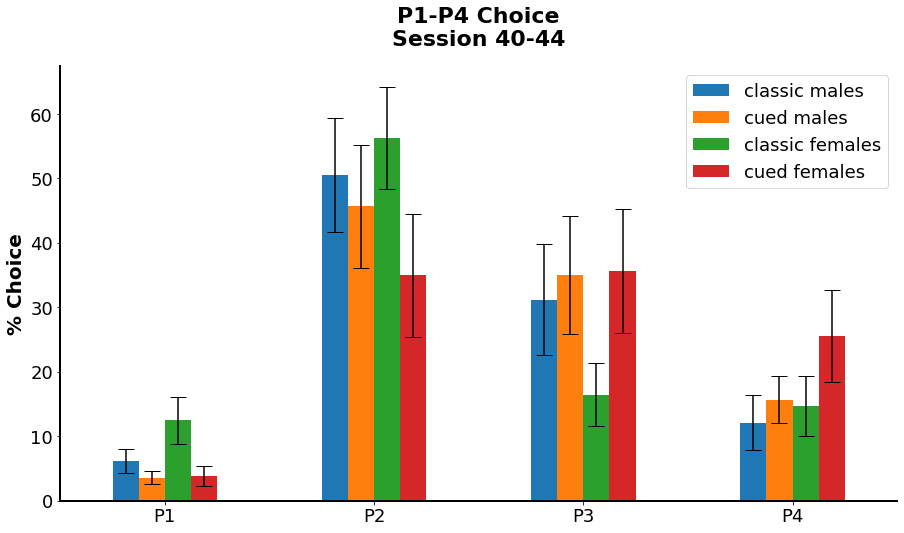

In [13]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

#To save figure:
#plt.savefig('BH07 Choice S29-30',facecolor = 'white')

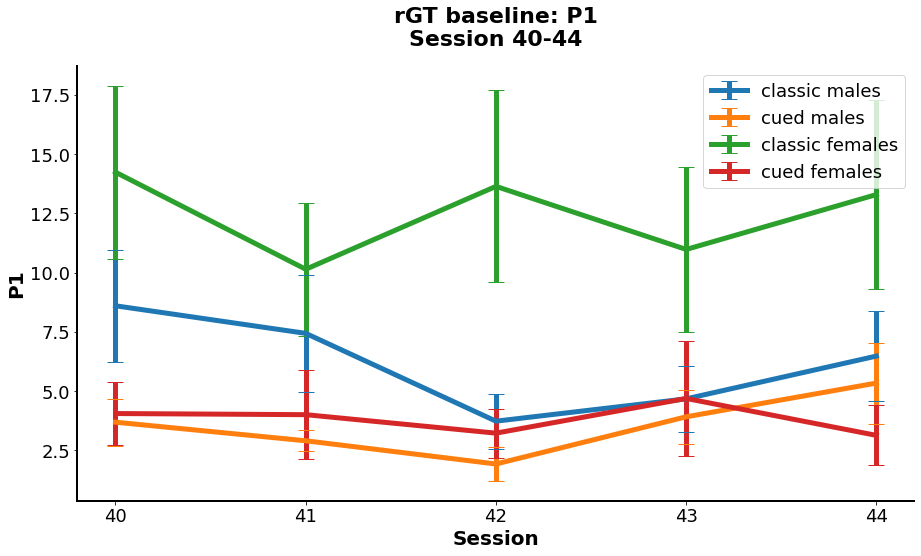

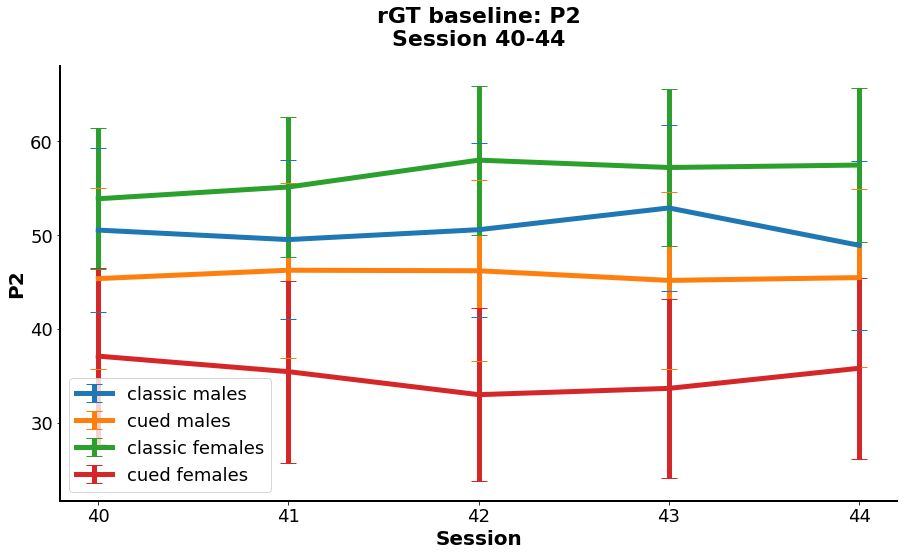

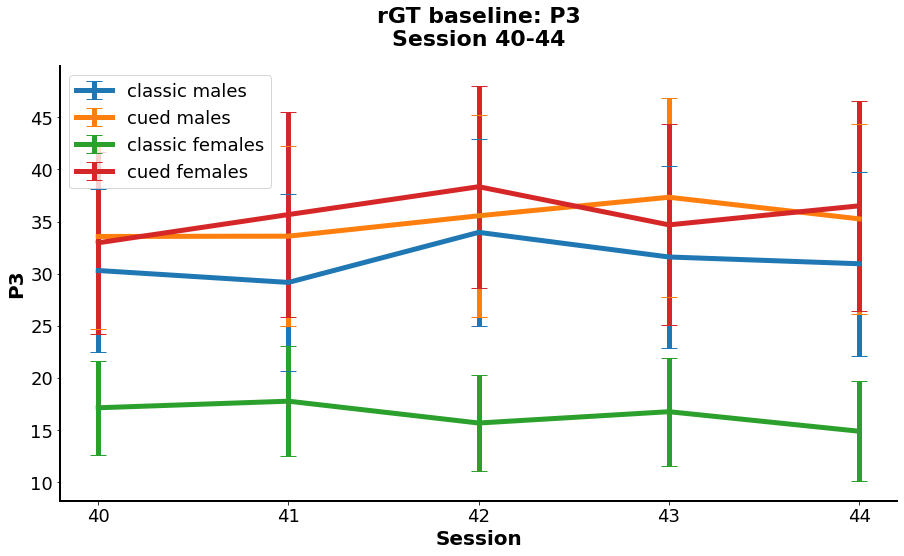

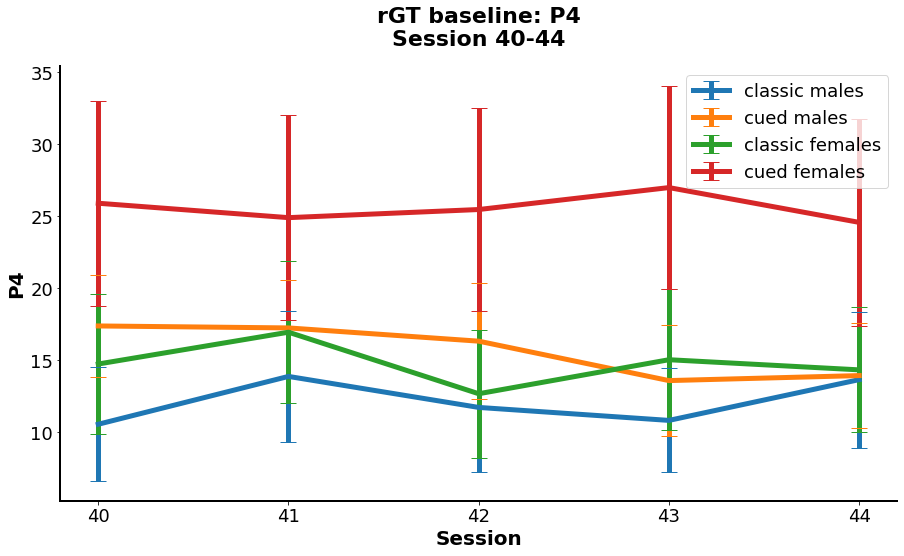

In [21]:
rgt.choice_line_plot('P1',startsess,endsess,title,mean_scores,SEM,group_names = group_names)

rgt.choice_line_plot('P2',startsess,endsess,title,mean_scores,SEM,group_names = group_names)

rgt.choice_line_plot('P3',startsess,endsess,title,mean_scores,SEM,group_names = group_names)

rgt.choice_line_plot('P4',startsess,endsess,title,mean_scores,SEM,group_names = group_names)

## Line plot of other variables


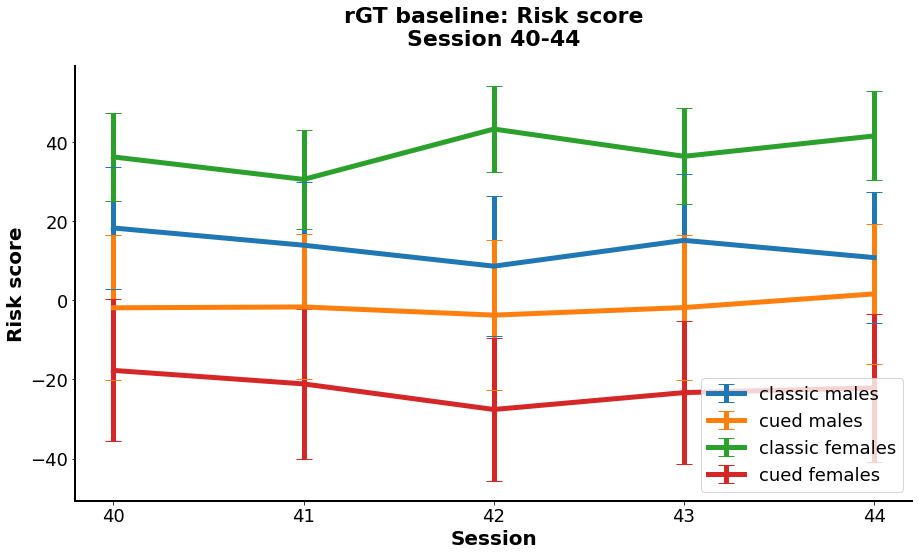

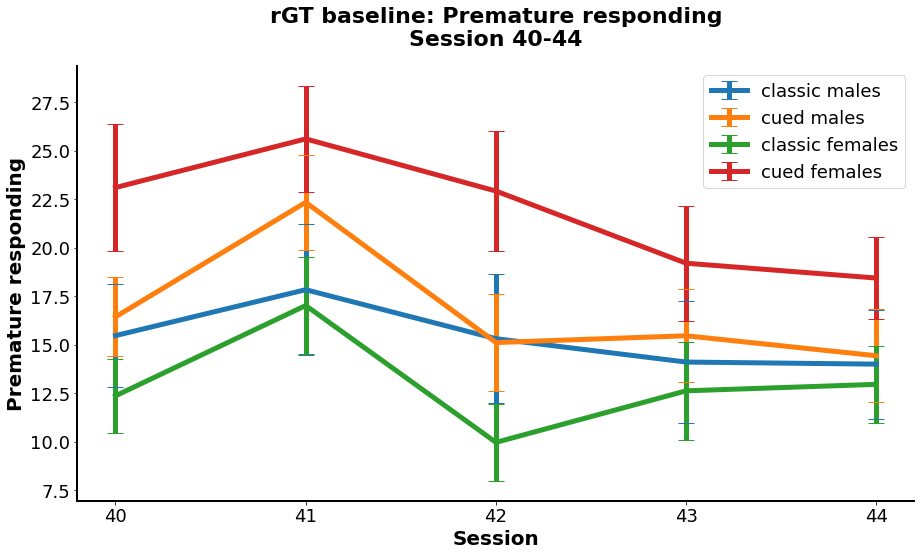

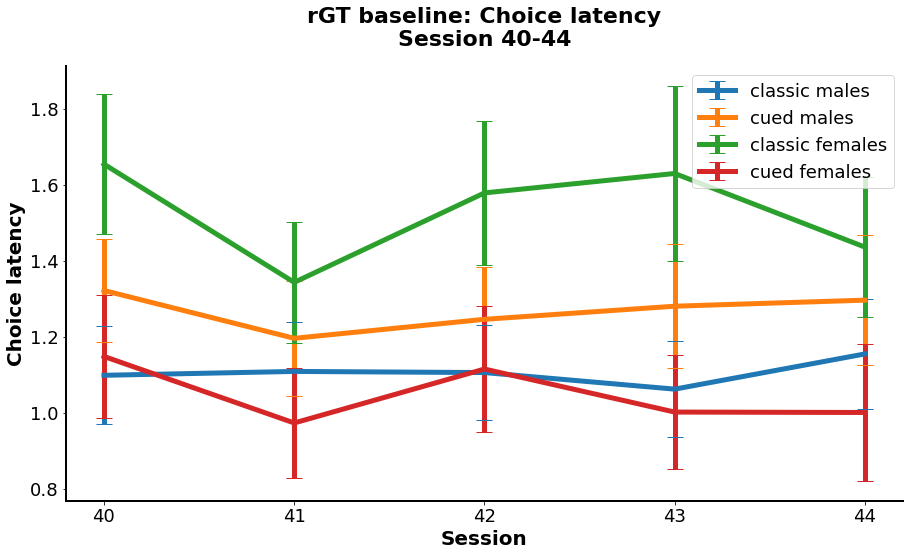

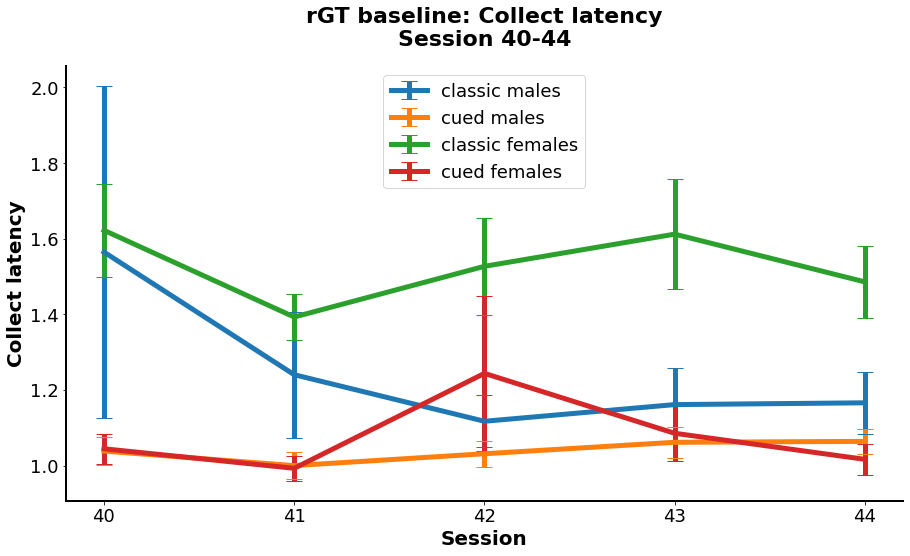

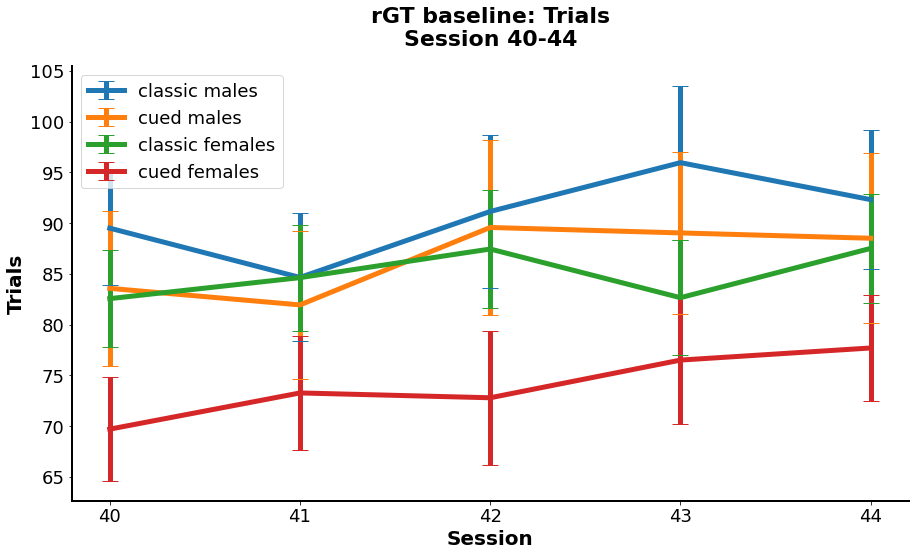

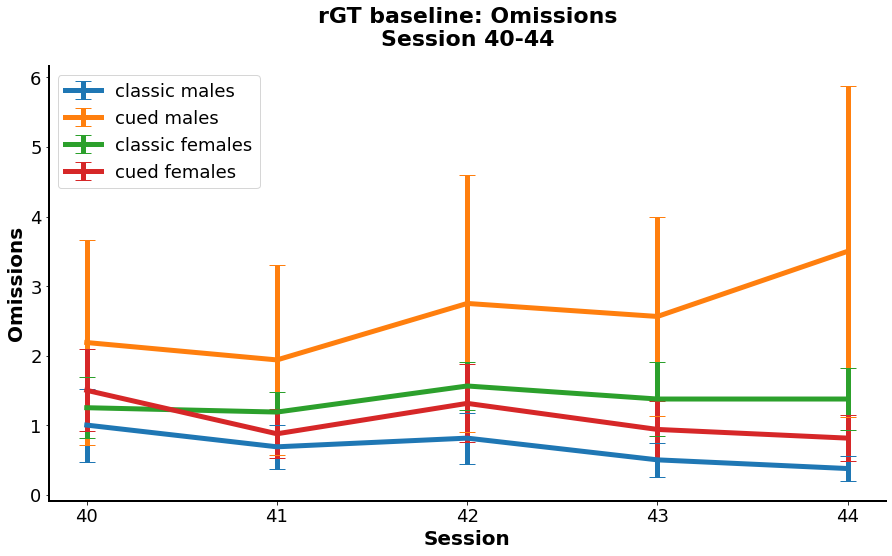

In [23]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding')

rgt.rgt_plot('choice_lat', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Choice latency') 

rgt.rgt_plot('collect_lat', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Collect latency') 

rgt.rgt_plot('trial', startsess, endsess, title,mean_scores, SEM, group_names = group_names, y_label = 'Trials') 

rgt.rgt_plot('omit', startsess, endsess, title,mean_scores, SEM, group_names = group_names, y_label = 'Omissions') 

## Bar plot of other variables



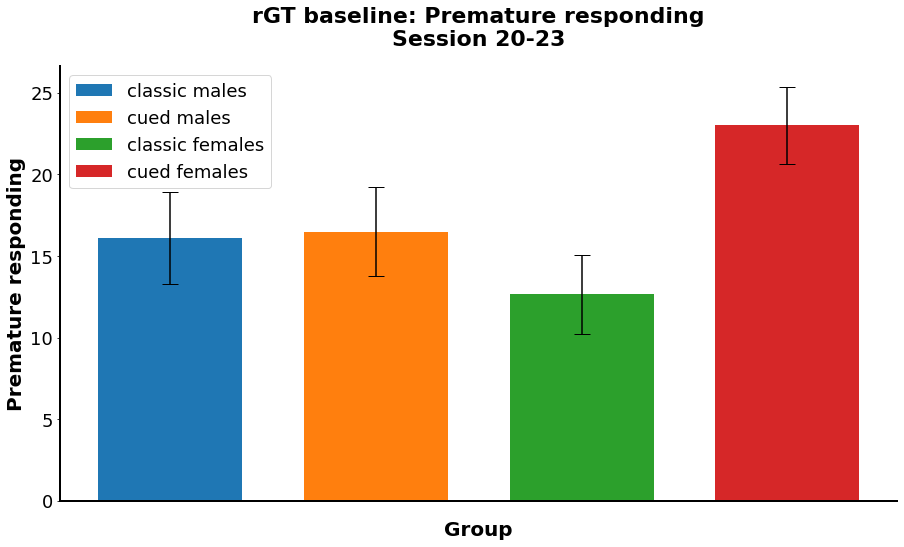

In [44]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Premature responding')

## Plotting by risk status and sex

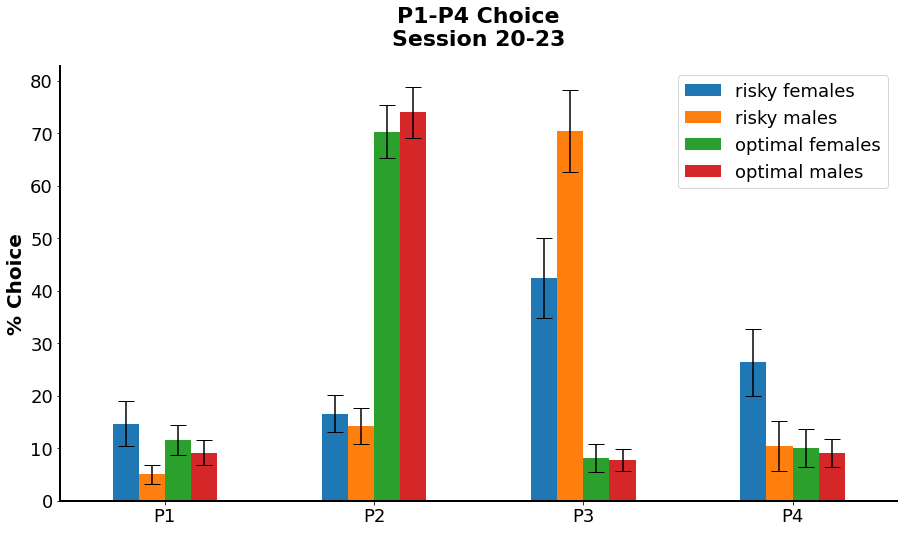

In [31]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_risk_sex, SEM_risk_sex)

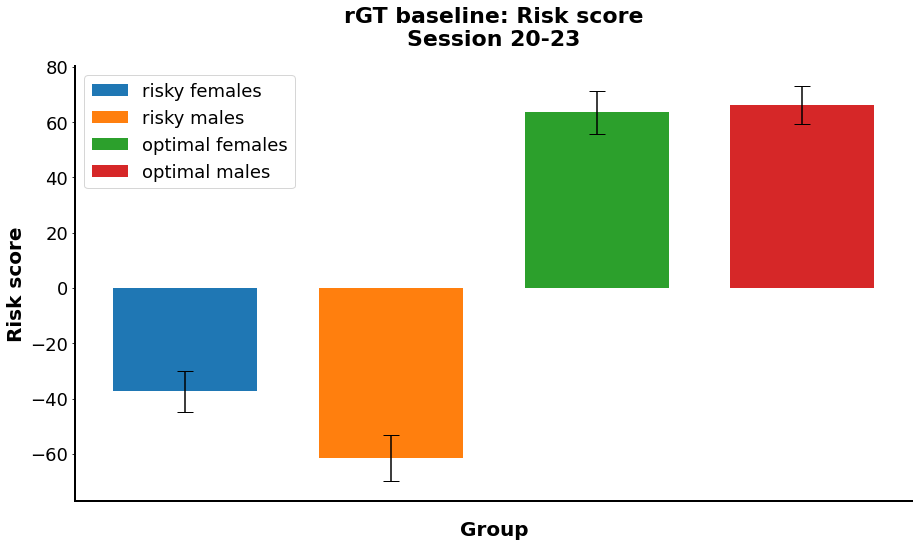

In [34]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores_risk_sex, SEM_risk_sex, 
             group_names = group_names_risk_sex, y_label = 'Risk score') 

## Plotting by task

In [22]:
rgt.rgt_bar_plot('collect_lat', startsess, endsess, title, mean_scores_task, SEM_task,
                 group_names = group_names_task,y_label = 'Collect latency')

NameError: name 'mean_scores_task' is not defined

## Plotting by risk status and task

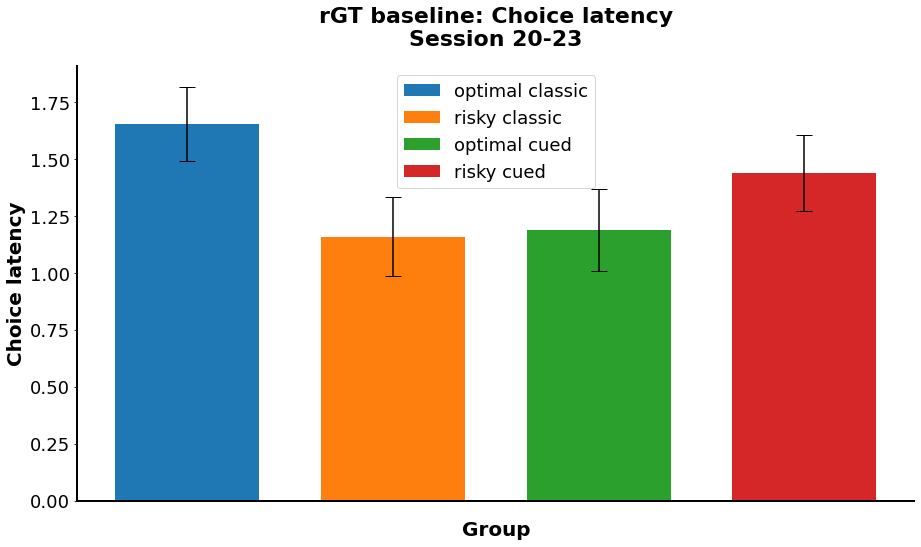

In [42]:
rgt.rgt_bar_plot('choice_lat', startsess, endsess, title, mean_scores_task_risk, SEM_task_risk,
                 group_names = group_names_task_risk,y_label = 'Choice latency')

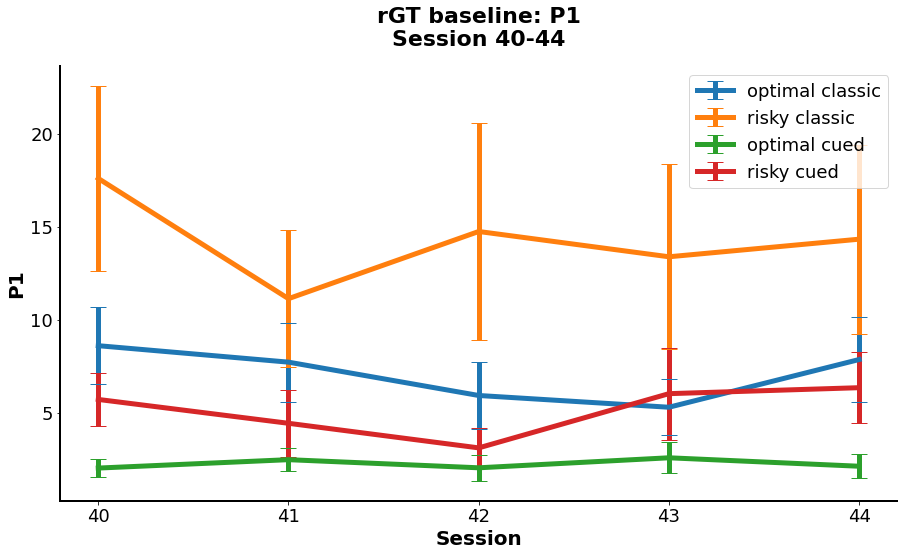

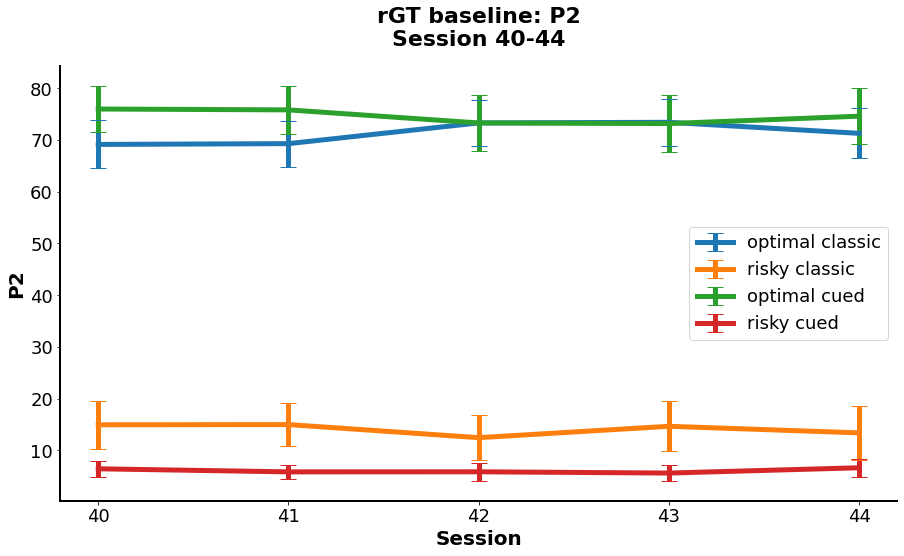

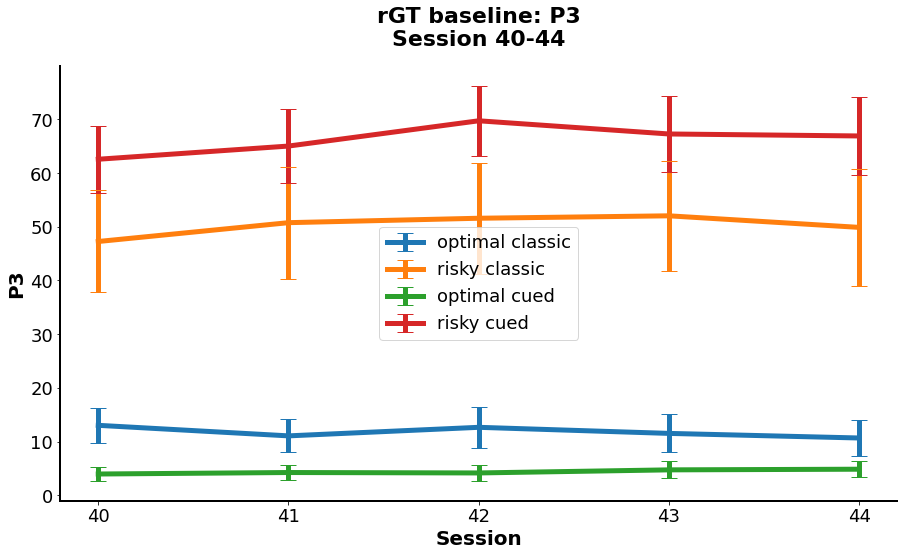

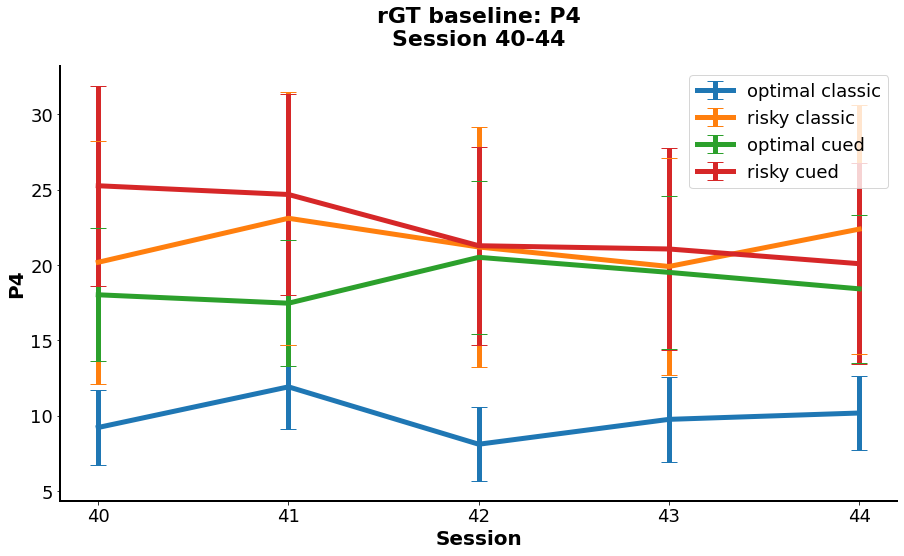

In [25]:
rgt.choice_line_plot('P1',startsess,endsess,title,mean_scores_task_risk,SEM_task_risk,group_names = group_names_task_risk)

rgt.choice_line_plot('P2',startsess,endsess,title,mean_scores_task_risk,SEM_task_risk,group_names = group_names_task_risk)

rgt.choice_line_plot('P3',startsess,endsess,title,mean_scores_task_risk,SEM_task_risk,group_names = group_names_task_risk)

rgt.choice_line_plot('P4',startsess,endsess,title,mean_scores_task_risk,SEM_task_risk,group_names = group_names_task_risk)

## Plotting all groups

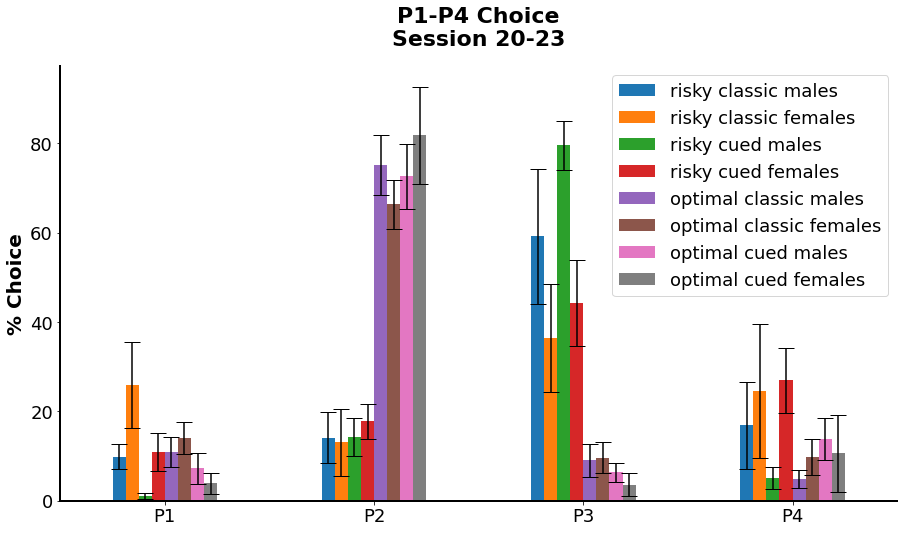

In [32]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_all, SEM_all)

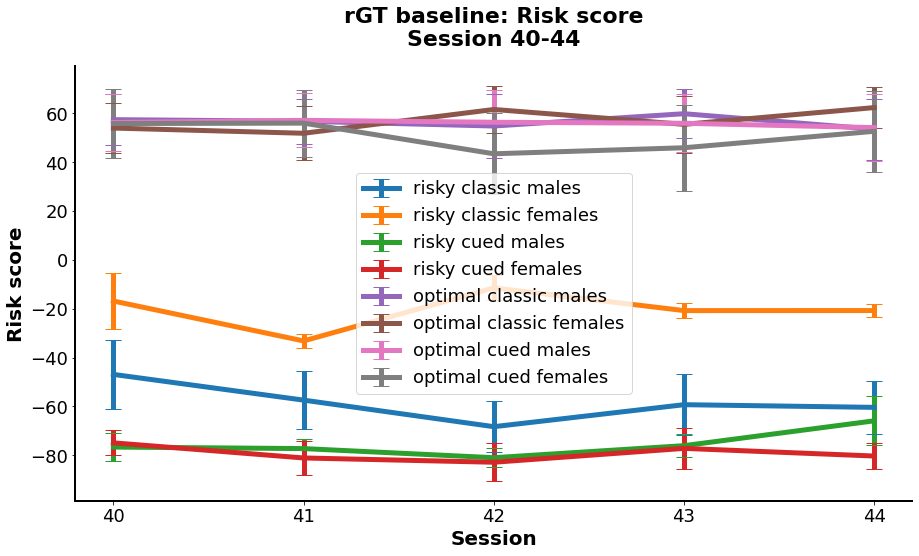

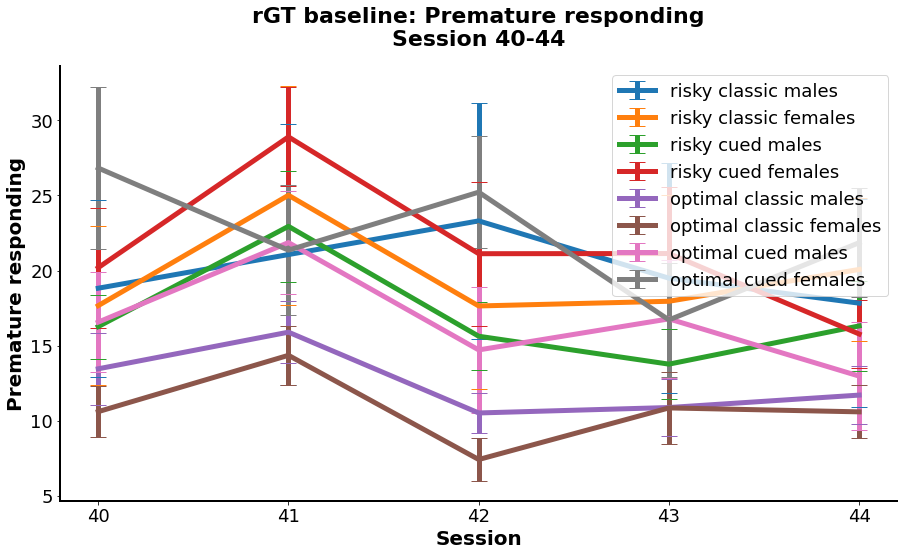

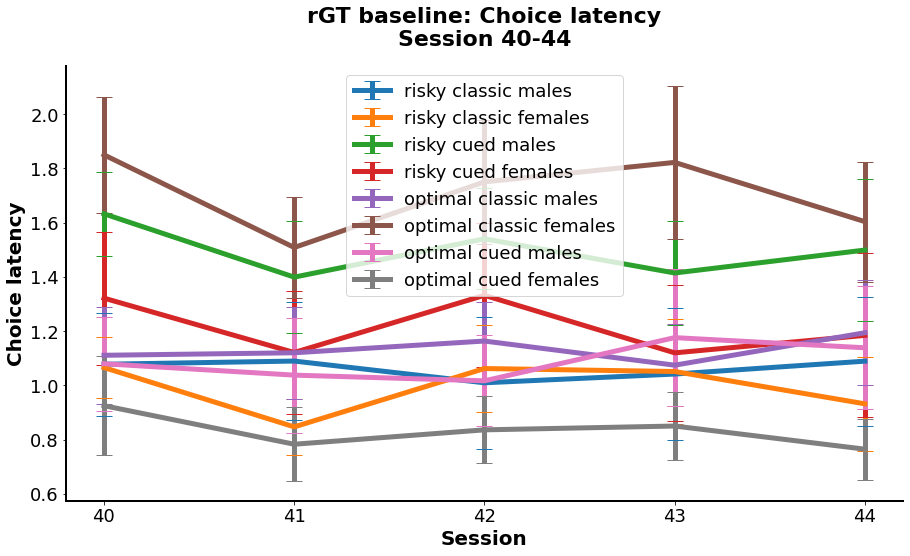

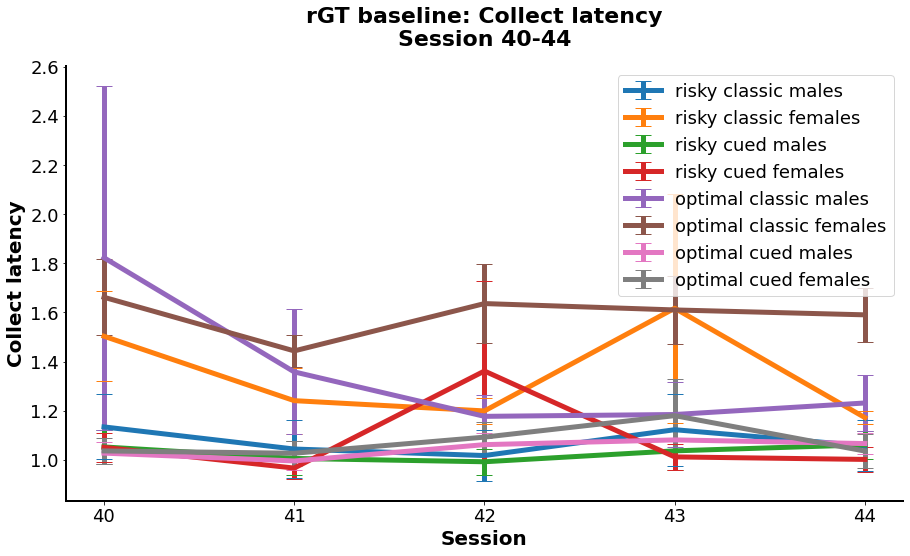

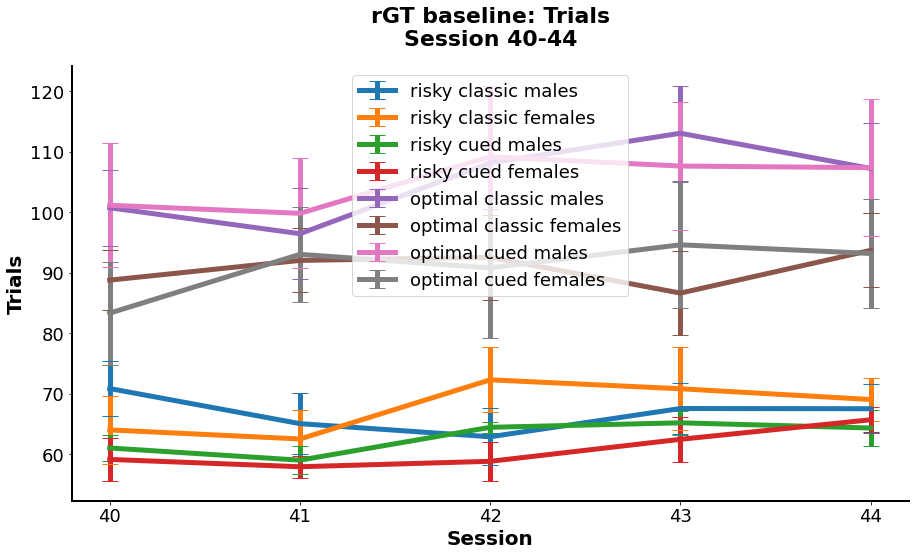

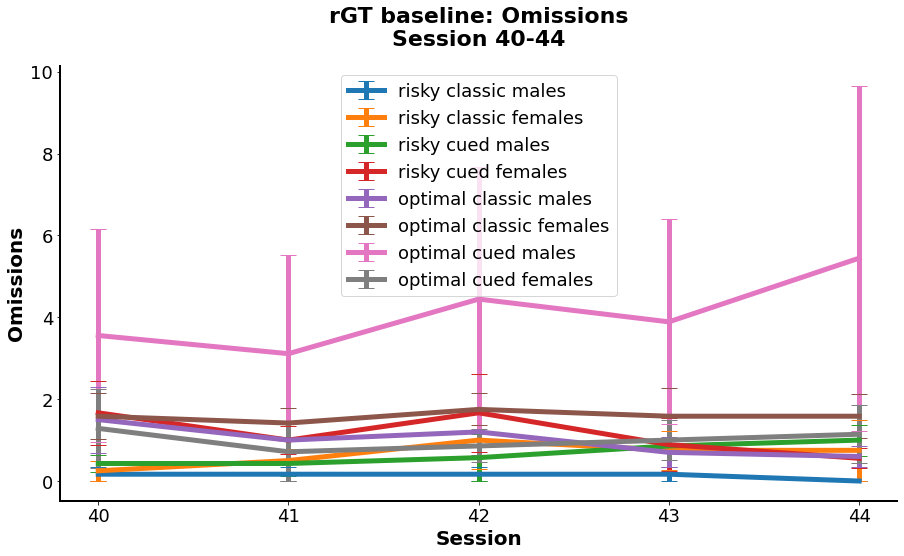

In [18]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores_all, SEM_all, group_names = group_names_all, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores_all, SEM_all, group_names = group_names_all, y_label = 'Premature responding')

rgt.rgt_plot('choice_lat', startsess, endsess, title, mean_scores_all, SEM_all, group_names = group_names_all, y_label = 'Choice latency') 

rgt.rgt_plot('collect_lat', startsess, endsess, title, mean_scores_all, SEM_all, group_names = group_names_all, y_label = 'Collect latency') 

rgt.rgt_plot('trial', startsess, endsess, title, mean_scores_all, SEM_all, group_names = group_names_all, y_label = 'Trials') 

rgt.rgt_plot('omit', startsess, endsess, title, mean_scores_all, SEM_all, group_names = group_names_all, y_label = 'Omissions') 

In [ ]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk,y_label = 'Premature responding')